In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yasin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv(r"C:\Users\yasin\Desktop\otel-restoran-tahmini\csv\lemmatized_sentences.csv", header=None, names=["yorumlar"])

In [3]:
df

,yorumlar
0,fry terrific also hot crisp love food server m...
1,abso loved charcuterie board burger course oni...
2,authentic delicious korean cuisine example sea...
3,best steak vibe city stand dish maine lobster ...
4,coq au vin tasty moist chicken served delicate...
...,...
8679,overall experience good
8680,everything good
8681,ac room service good
8682,like thank manager


In [6]:

def zipf_analysis(text_column, num_words=50):
    # Geçersiz ve boş değerleri temizle
    cleaned_texts = text_column.dropna().astype(str)

    if cleaned_texts.empty:
        print("Uyarı: Metin verisi boş. Analiz yapılamaz.")
        return

    # Metinleri birleştir ve temizle
    text = ' '.join(cleaned_texts).lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenizasyon
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]

    if not tokens:
        print("Uyarı: Temizleme sonrası analiz yapılacak kelime kalmadı.")
        return

    # Kelime sıklığı
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(num_words)

    # Sıra ve sıklık verileri
    ranks = np.arange(1, len(most_common_words) + 1)
    frequencies = [count for word, count in most_common_words]

    # Grafik
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='o')
    plt.xlabel('Kelime Sırası (log)')
    plt.ylabel('Kelime Sıklığı (log)')
    plt.title('Zipf Yasası Analizi (lemmatized_sentences)')
    plt.grid(True)
    plt.show()

    # Bilgi çıktısı
    print(f"Toplam kelime sayısı: {len(tokens)}")
    print(f"Farklı kelime sayısı: {len(word_counts)}")

    if len(tokens) < 10000:
        print("Veri seti küçük. Zipf analizi sınırlı genellenebilir.")
    else:
        print("Veri seti yeterli büyüklükte.")

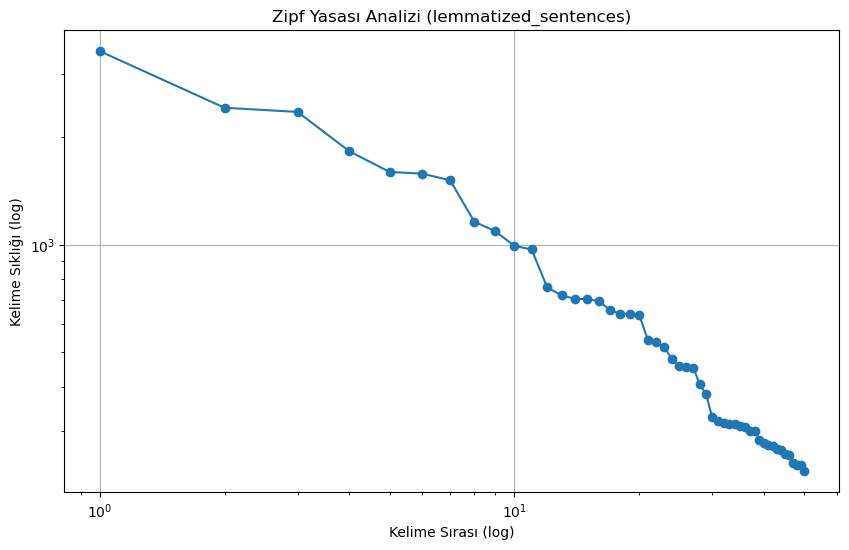

Toplam kelime sayısı: 92459
Farklı kelime sayısı: 6618
Veri seti yeterli büyüklükte.


In [7]:
df = pd.read_csv(r"C:\Users\yasin\Desktop\otel-restoran-tahmini\csv\lemmatized_sentences.csv", header=None, names=["yorumlar"])
zipf_analysis(df["yorumlar"])